<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Intro_to_Keras_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q pyyaml

In [2]:
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
Double check with Python 3


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Flatten

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


### Models types
### Sequential
Simple stack of layers
### Functional
Multi input, multi output, shared layers, non sequential flows
### Model Subclassing
Customizable, define foward pass with ```call``` method. Enables [eager execution](https://www.tensorflow.org/guide/eager#build_a_model)

In [4]:
!wget https://storage.googleapis.com/nicksdemobucket/pima.csv

--2019-03-21 22:42:54--  https://storage.googleapis.com/nicksdemobucket/pima.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23350 (23K) [application/octet-stream]
Saving to: ‘pima.csv’

pima.csv            100%[===================>]  22.80K  --.-KB/s    in 0s      

2019-03-21 22:42:54 (80.8 MB/s) - ‘pima.csv’ saved [23350/23350]



In [5]:
import pandas as pd
df = pd.read_csv('pima.csv')
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesFunc,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
features = df.drop(['Class'], axis=1).values
labels = df[['Class']].values
print (features.shape, labels.shape)

(768, 8) (768, 1)


### Sequential Model

In [10]:
# maximum simplicity
seq_model = Sequential()

seq_model.add(Dense(10, activation='relu', input_shape=(8,)))
seq_model.add(Dense(10, activation='relu'))
seq_model.add(Dense(1, activation='sigmoid'))

seq_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

seq_model.fit(features, labels, epochs=10, batch_size=4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
768/768 [==============================] - 1s 936us/sample - loss: 5.6156 - acc: 0.6510
Epoch 2/10
768/768 [==============================] - 0s 365us/sample - loss: 5.6084 - acc: 0.6510
Epoch 3/10
768/768 [==============================] - 0s 394us/sample - loss: 5.6010 - acc: 0.6510
Epoch 4/10
768/768 [==============================] - 0s 376us/sample - loss: 4.6510 - acc: 0.6484
Epoch 5/10
768/768 [==============================] - 0s 288us/sample - loss: 0.8711 - acc: 0.6159
Epoch 6/10
768/768 [==============================] - 0s 293us/sample - loss: 0.6728 - acc: 0.6432
Epoch 7/10
768/768 [==============================] - 0s 296us/sample - loss: 0.6636 - acc: 0.6393
Epoch 8/10
768/768 [==============================] - 0s 294us/sample - loss: 0.6430 - acc: 0.6576
Epoch 9/10
768/768 [==============================] - 0s 292us/sample - loss: 0.6369 - a

### Functional Model
[example](https://cdn-images-1.medium.com/max/2600/1*6hF97Upuqg_LdsqWY6n_wg.png)

In [11]:
# more full featured and flexible
inputs = keras.Input(shape=(8,))
x = Dense(10, activation='relu')(inputs)
y = Dense(10, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(y)

func_model = keras.Model(inputs, outputs)


func_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
func_model.fit(features, labels, epochs=10, batch_size=4)

Epoch 1/10
768/768 [==============================] - 0s 491us/sample - loss: 1.6824 - acc: 0.6120
Epoch 2/10
768/768 [==============================] - 0s 292us/sample - loss: 0.8600 - acc: 0.6667
Epoch 3/10
768/768 [==============================] - 0s 373us/sample - loss: 0.7215 - acc: 0.6771
Epoch 4/10
768/768 [==============================] - 0s 323us/sample - loss: 0.6906 - acc: 0.6745
Epoch 5/10
768/768 [==============================] - 0s 359us/sample - loss: 0.6797 - acc: 0.6810
Epoch 6/10
768/768 [==============================] - 0s 400us/sample - loss: 0.6615 - acc: 0.6810
Epoch 7/10
768/768 [==============================] - 0s 315us/sample - loss: 0.6565 - acc: 0.6966
Epoch 8/10
768/768 [==============================] - 0s 313us/sample - loss: 0.6390 - acc: 0.6940
Epoch 9/10
768/768 [==============================] - 0s 318us/sample - loss: 0.6304 - acc: 0.6901
Epoch 10/10
768/768 [==============================] - 0s 323us/sample - loss: 0.6280 - acc: 0.7018


### Model Subclassing

In [12]:
# maximally flexible and hackable
class ScModel(keras.Model):
  
  def __init__(self):
    super(ScModel, self).__init__()
    self.dense1 = Dense(10, activation='relu')
    self.dense2 = Dense(10, activation='relu')
    self.dense3 = Dense(1, activation='sigmoid')
    
  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    return self.dense3(x)
  
sc_model = ScModel()

sc_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

sc_model.fit(features, labels, epochs=10, batch_size=4)

Epoch 1/10
768/768 [==============================] - 0s 570us/sample - loss: 1.8323 - acc: 0.5391
Epoch 2/10
768/768 [==============================] - 0s 373us/sample - loss: 0.9912 - acc: 0.5625
Epoch 3/10
768/768 [==============================] - 0s 376us/sample - loss: 0.9387 - acc: 0.5495
Epoch 4/10
768/768 [==============================] - 0s 365us/sample - loss: 0.8827 - acc: 0.5794
Epoch 5/10
768/768 [==============================] - 0s 368us/sample - loss: 0.8586 - acc: 0.6354
Epoch 6/10
768/768 [==============================] - 0s 361us/sample - loss: 0.7595 - acc: 0.6341
Epoch 7/10
768/768 [==============================] - 0s 325us/sample - loss: 0.7032 - acc: 0.6458
Epoch 8/10
768/768 [==============================] - 0s 296us/sample - loss: 0.6957 - acc: 0.6510
Epoch 9/10
768/768 [==============================] - 0s 299us/sample - loss: 0.6719 - acc: 0.6602
Epoch 10/10
768/768 [==============================] - 0s 299us/sample - loss: 0.6870 - acc: 0.6602


### Visualize model

The summary is useful for simple models, but can be confusing for models that have multiple inputs or outputs.

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* ```model```: (required) The model that you wish to plot.
* ```to_file```: (required) The name of the file to which to save the plot.
* ```show_shapes```: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* ```show_layer_names```: (optional, defaults to True) Whether or not to show the name for each layer.

In [13]:
sc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  90        
_________________________________________________________________
dense_7 (Dense)              multiple                  110       
_________________________________________________________________
dense_8 (Dense)              multiple                  11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


[fully connected NN](https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/assets/tfdl_0402.png)

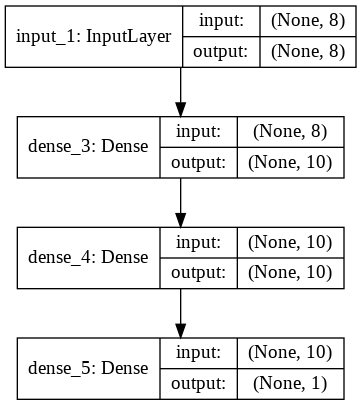

In [14]:
mod = func_model

tf.keras.utils.plot_model(
    mod, 
    to_file='{}.png'.format(mod), 
    show_shapes=True, 
    show_layer_names=True
)

from IPython.display import Image
Image(retina=True, filename='{}.png'.format(mod))

### Evaluate and predict

The `tf.keras.Model.evaluate` and `tf.keras.Model.predict` methods can use NumPy
data and a `tf.data.Dataset`.

To *evaluate* the inference-mode loss and metrics for the data provided:

In [15]:
import numpy as np

some_new_data = np.array([[6., 148.,72.,35.,0.,33.6,0.627, 50.]])
some_new_data.shape

(1, 8)

In [16]:
predicted_labels = sc_model.predict(some_new_data)
predicted_labels

array([[0.7113905]], dtype=float32)

In [17]:
sc_model.evaluate(features, labels)

768/768 [==============================] - 0s 107us/sample - loss: 0.6046 - acc: 0.6810


[0.6045760847628117, 0.68098956]

### Input tf.data datasets

Use the Dataset API to scale to large datasets
or multi-device training. Pass a `tf.data.Dataset` instance to the `fit`
method:

Here, the `fit` method uses the `steps_per_epoch` argument—this is the number of
training steps the model runs before it moves to the next epoch. Since the
`Dataset` yields batches of data, this snippet does not require a `batch_size`.

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.batch(32)
dataset = dataset.repeat()

In [0]:
sc_model.fit(dataset, epochs=10, steps_per_epoch=30)

### Custom layers

[Arguments](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
-
[Implementation](https://github.com/keras-team/keras/blob/master/keras/layers/core.py)

Create a custom layer by subclassing `tf.keras.layers.Layer` and implementing
the following methods:

* `build`: Create the weights of the layer. Add weights with the `add_weight`
  method.
* `call`: Define the forward pass.
* `compute_output_shape`: Specify how to compute the output shape of the layer
  given the input shape.
* Optionally, a layer can be serialized by implementing the `get_config` method
  and the `from_config` class method.

Here's an example of a custom layer that implements a `matmul` of an input with
a kernel matrix:

In [0]:
layers.

In [0]:
class MyLayer(layers.Layer):

  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    shape = tf.TensorShape((input_shape[1], self.output_dim))
    # Create a trainable weight variable for this layer.
    self.kernel = self.add_weight(name='kernel',
                                  shape=shape,
                                  initializer='uniform',
                                  trainable=True)
    # Make sure to call the `build` method at the end
    super(MyLayer, self).build(input_shape)

  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

  def compute_output_shape(self, input_shape):
    shape = tf.TensorShape(input_shape).as_list()
    shape[-1] = self.output_dim
    return tf.TensorShape(shape)

  def get_config(self):
    base_config = super(MyLayer, self).get_config()
    base_config['output_dim'] = self.output_dim
    return base_config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

In [0]:
model = Sequential()

model.add(MyLayer(10))
model.add(layers.Activation('softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(features, labels, batch_size=4, epochs=5)

## Callbacks

A callback is an object passed to a model to customize and extend its behavior
during training. You can write your own custom callback, or use the built-in
`tf.keras.callbacks` that include:

* `tf.keras.callbacks.ModelCheckpoint`: Save checkpoints of your model at
  regular intervals.
* `tf.keras.callbacks.LearningRateScheduler`: Dynamically change the learning
  rate.
* `tf.keras.callbacks.EarlyStopping`: Interrupt training when validation
  performance has stopped improving.
* `tf.keras.callbacks.TensorBoard`: Monitor the model's behavior using
  [TensorBoard](./summaries_and_tensorboard.md).

To use a `tf.keras.callbacks.Callback`, pass it to the model's `fit` method:

In [0]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

model.fit(features, labels, batch_size=32, epochs=5, callbacks=callbacks, validation_split=0.2)

## Model Saving and Restoring
### Weights only

Save and load the weights of a model using `tf.keras.Model.save_weights`:

### Configuration only

A model's configuration can be saved—this serializes the model architecture
without any weights. A saved configuration can recreate and initialize the same
model, even without the code that defined the original model. Keras supports
JSON and YAML serialization formats:

### Entire model

The entire model can be saved to a file that contains the weight values, the
model's configuration, and even the optimizer's configuration. This allows you
to checkpoint a model and resume training later—from the exact same
state—without access to the original code.

In [0]:
model = tf.keras.Sequential([
  layers.Dense(10, activation='softmax', input_shape=(8,)),
  layers.Dense(1, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(features, labels, batch_size=4, epochs=10)

model.save('my_model.h5')

In [0]:
model = tf.keras.models.load_model('my_model.h5')

results = model.predict(some_new_data)
results[0]

## Pretrained Models

### Use pretrained model
### Get embeddings from pretrained models
### Finetune pretrained model

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import tensorflow.keras.backend as K
import numpy as np

In [0]:
model = ResNet50(weights='imagenet')

[pretrained keras models](https://keras.io/applications/)

[imagenet classes](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

In [0]:
#!wget -O test.png https://www.freepngimg.com/thumb/corn/23-corn-png-image-thumb.png
!wget -O test.png https://vignette.wikia.nocookie.net/dino/images/f/f6/JW_triceratops.png/revision/latest?cb=20150407211112

In [0]:
img_path = 'test.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=10)[0])

In [0]:
# Other way to do the same thing, just create another model
emb_model = Model(inputs=model.inputs, outputs=model.get_layer('avg_pool').output)

emb_model.predict(x).shape

### Fine-tuning pre-trained model
Provided that our dataset is not drastically different in context to the original dataset, we can use pretrained models like the one above to fine tune to a different task

In [0]:
[print(l) for l in model.layers[-10:]]

In [0]:
# remove the softmax layer
model = Model(inputs=model.inputs, outputs=model.get_layer('avg_pool').output)
[print(l) for l in model.layers[-10:]]

In [0]:
# Freeze the previous layers
for layer in model.layers[:-1]:
    layer.trainable = False

# add a couple layers
x = Flatten()(model.layers[-1].output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(100, activation='softmax')(x)

model = Model(inputs=model.input, outputs=out)

[print(l) for l in model.layers[-10:]]

In [0]:
model.summary()

In [0]:
model.summary()

In [0]:
model.compile(optimizer=Adam(lr=0.0001, momentum=0.9), loss='caregorical_crossentropy')
model.fit_generator(...,...)

## Toy video-QA problem
![sequence](https://storage.googleapis.com/nicksdemobucket/Screen%20Shot%202019-02-20%20at%202.17.39%20PM.png)
![architecture](https://storage.googleapis.com/nicksdemobucket/Screen%20Shot%202019-02-20%20at%202.17.52%20PM.png)

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3

In [0]:
input_voc_size = # Size of vocabulary of possible answers
data_generator = # input as question and 

In [0]:
video = keras.Input(shape=(None, 150, 150, 3), name='video')
cnn = InceptionV3(weights='imagenet',
include_top=False,
pooling='avg')
cnn.trainable = False
frame_features = layers.TimeDistributed(cnn)(video)
video_vector = layers.LSTM(256)(frame_features)

In [0]:
question = keras.Input(shape=(None,), dtype='int32', name='question')
embedded_words = layers.Embedding(input_voc_size, 256)(question)
question_vector = layers.LSTM(128)(embedded_words)

In [0]:
x = layers.concatenate([video_vector, question_vector])
x = layers.Dense(128, activation=tf.nn.relu)(x)
predictions = layers.Dense(output_voc_size,
 activation='softmax',
 name='predictions')(x)

In [0]:
model = keras.models.Model([video, question], predictions)
model.compile(optimizer=tf.AdamOptimizer(),loss=keras.losses.categorical_crossentropy)
model.fit_generator(data_generator, steps_per_epoch=1000, epochs=100)

## Futher Reading
* https://github.com/Dataweekends/zero_to_deep_learning_video 
* https://github.com/keras-team/keras/tree/master/examples 
* https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras 
* https://medium.com/tensorflow/tagged/keras
* https://github.com/keras-team/keras